In [1]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization

plt.style.use('ggplot')
sns.set()

In [2]:
bank_df = pd.read_csv('Bank_Customer_retirement.csv')

In [3]:
bank_df.keys()

Index(['Customer ID', 'Age', '401K Savings', 'Retire'], dtype='object')

In [4]:
bank_df.shape

(500, 4)

In [5]:
bank_df.head()

,Customer ID,Age,401K Savings,Retire
0,0,39.180417,322349.8740,0
1,1,56.101686,768671.5740,1
2,2,57.023043,821505.4718,1
3,3,43.711358,494187.4850,0
4,4,54.728823,691435.7723,1


In [6]:
bank_df.tail()

,Customer ID,Age,401K Savings,Retire
495,495,46.678128,704243.0776,1
496,496,43.545007,483175.9998,0
497,497,46.476724,354919.1987,0
498,498,50.903631,639789.9219,1
499,499,38.590586,491310.0096,0


### VISUALIZING THE DATA

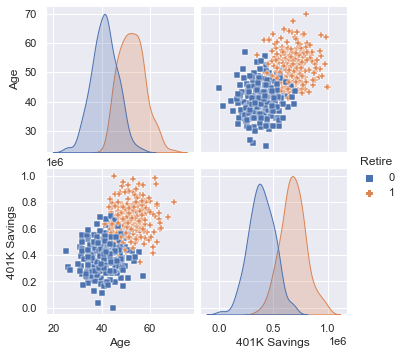

In [7]:
sns.pairplot(bank_df, hue='Retire', vars=['Age', '401K Savings'],markers=[',','P'])

C:\Users\Oluwasegun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Retire', ylabel='count'>

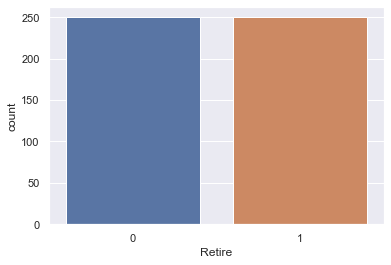

In [8]:
sns.countplot(bank_df['Retire'], label='Retirement')

### MODEL TRAINING

In [9]:
bank_df = bank_df.drop(['Customer ID'], axis=1)

In [10]:
X = bank_df.drop(['Retire'],axis=1)

In [11]:
X

,Age,401K Savings
0,39.180417,322349.8740
1,56.101686,768671.5740
2,57.023043,821505.4718
3,43.711358,494187.4850
4,54.728823,691435.7723
...,...,...
495,46.678128,704243.0776
496,43.545007,483175.9998
497,46.476724,354919.1987
498,50.903631,639789.9219


In [12]:
y = bank_df['Retire']
y

0      0
1      1
2      1
3      0
4      1
      ..
495    1
496    0
497    0
498    1
499    0
Name: Retire, Length: 500, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.02,random_state=5)

In [14]:
X_train.shape

(490, 2)

In [15]:
X_test.shape

(10, 2)

In [16]:
y_train.shape

(490,)

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

### EVALUATING THE MODEL

In [18]:
y_predict = svc_model.predict(X_test)

In [19]:
cm = confusion_matrix(y_test,y_predict)

<AxesSubplot:>

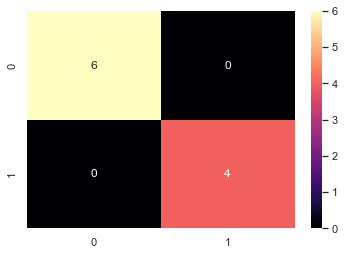

In [20]:
sns.heatmap(cm, annot=True, cmap='magma')

In [21]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



### IMPROVING THE MODEL

In [22]:
min_train = X_train.min()
min_train

Age             25.0
401K Savings    10.0
dtype: float64

In [23]:
range_train = (X_train - min_train).max()
range_train

Age                 45.0
401K Savings    999990.0
dtype: float64

In [24]:
X_train_scaled = (X_train - min_train) / range_train

In [25]:
X_train_scaled

,Age,401K Savings
56,0.472489,0.652614
344,0.428017,0.762195
472,0.434484,0.477702
248,0.788118,0.723955
221,0.301350,0.312461
...,...,...
486,0.296692,0.033828
189,0.264527,0.374391
495,0.481736,0.704240
206,0.479986,0.626791


In [26]:
y_train

56     1
344    1
472    0
248    1
221    0
      ..
486    0
189    0
495    1
206    1
355    0
Name: Retire, Length: 490, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='401K Savings'>

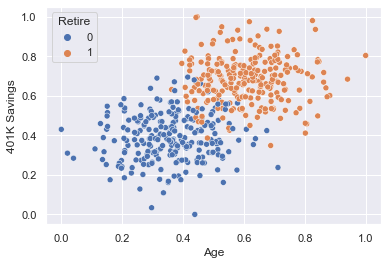

In [27]:
sns.scatterplot(x = X_train_scaled['Age'], y = X_train_scaled['401K Savings'], hue = y_train)

In [28]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

In [29]:
svc_model.fit(X_train_scaled,y_train)

SVC()

<AxesSubplot:>

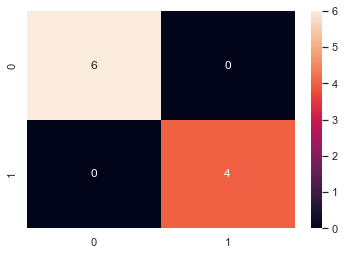

In [30]:
y_predict = svc_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_predict)

sns.heatmap(cm, annot=True,fmt='d')

In [31]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



### IMPROVING THE MODEL - PART 2

In [32]:
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']} 

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [35]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.959 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.969 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.908 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.959 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.929 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.694 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.765 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.939 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=4)

In [36]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [37]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [38]:
grid_predictions = grid.predict(X_test_scaled)

<AxesSubplot:>

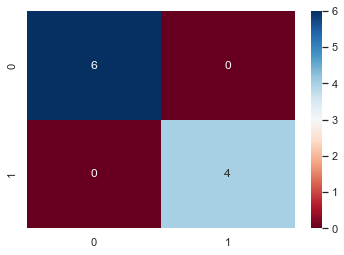

In [39]:
cm = confusion_matrix(y_test, grid_predictions)
sns.heatmap(cm, annot=True, cmap='RdBu')

In [40]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

